In [1]:
# use sample code

import numpy as np
import thinkstats2
import thinkplot

def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.
    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.birthwgt_lb1[df.birthwgt_lb1 > 20] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb1.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz1.replace(na_vals, np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb1 + df.birthwgt_oz1 / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.phase = np.nan

    
def ReadFemPreg(dct_file='data/2011_2013_FemPregSetup.dct',
                dat_file='data/2011_2013_FemPregData.dat.gz'):
    """Reads the NSFG pregnancy data.
    dct_file: string file name
    dat_file: string file name
    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file, encoding='iso-8859-1')
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df

births = ReadFemPreg()
births = births[['prglngth', 'birthord', 'birthwgt_lb1', 'birthwgt_oz1', 'agepreg']]
print(type(births))
print("births.head(10):\n", births.head(10))

<class 'pandas.core.frame.DataFrame'>
births.head(10):
    prglngth  birthord  birthwgt_lb1  birthwgt_oz1  agepreg
0        39       1.0           7.0           0.0    32.83
1        40       1.0           9.0           2.0    22.16
2        23       NaN           NaN           NaN      NaN
3        39       1.0           6.0          15.0    21.16
4        39       2.0           6.0           4.0    22.83
5        39       3.0           7.0           0.0    25.08
6        36       1.0           7.0           1.0    20.08
7        38       2.0           7.0          10.0    22.58
8         4       NaN           NaN           NaN    23.41
9        38       3.0           7.0          13.0    25.16


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


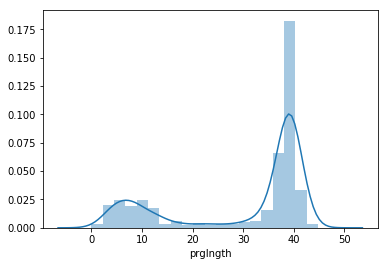

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(births['prglngth'])#, kde=False)
plt.show()

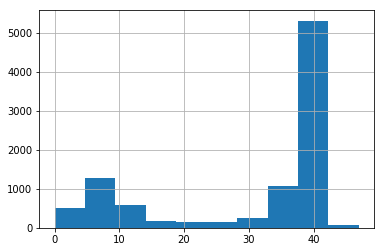

In [3]:
births['prglngth'].hist()
plt.show()

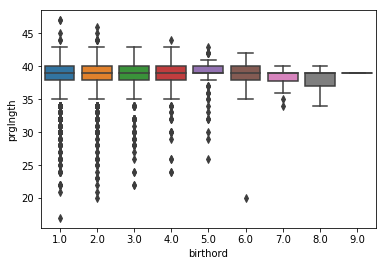

In [4]:
# x, y参数对应data中的列
sns.boxplot(x='birthord', y='prglngth', data=births)
plt.show()

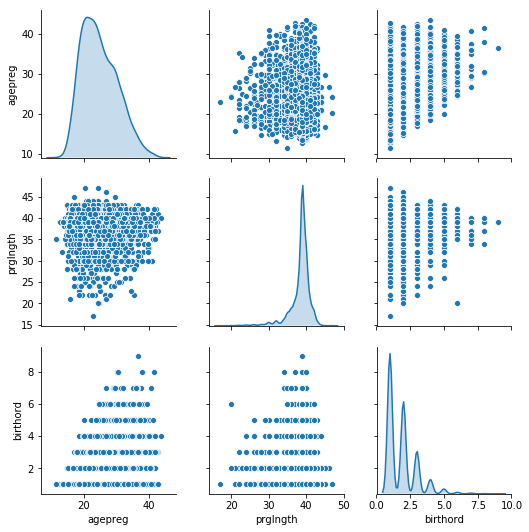

In [5]:
births_cleaned=births.dropna(axis=0, how='any')
sns.pairplot(births_cleaned, vars=['agepreg', 'prglngth', 'birthord'], diag_kind='kde')
plt.show()